
**This is what you'll need to submit on Gradescope:**

1. This notebook, completed.
2. Your data in csv form (as noted in the Data Cleaning section below).
3. Any other code you have written for your project.

# Data cleaning

The first step to data analysis is ensuring that you are focussing on the subset of the data that you have complete information about.

1. Having taken a look at your dataset, what columns and rows have you decided to drop from it? Why?

*A valid reason for dropping a column could be lack of information about the column, lack of a clear understanding of the units of measurement, a general feeling that it does not contain any useful information etc*

If you decided to focus on just a subset of your data please describe why you chose that subset and why you feel the other rows do not matter.

We have decided to drop the web description colums and the state column. we want to focus more on the other columns because we can extract more useful information from them to compare different aspects of each breach.  

2. If you chose to merge on any additional datasets, include the code for that here. 

*Answer in this markdown cell. Add more markdown cells if you want.*

In [47]:
import numpy as np
import pandas as pd

In [48]:
breaches = pd.read_csv("https://raw.githubusercontent.com/goyal-pranav/ESAP-final-project/main/breach_report.csv")

In [49]:
breaches.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,"Cavender Stores, Ltd Health Plan",TX,Health Plan,4447,07/20/2022,Hacking/IT Incident,Network Server,No,NaN
1,"Acts Retirement Services, Inc. and Affiliates",PA,Healthcare Provider,2236,07/15/2022,Hacking/IT Incident,Network Server,No,NaN
2,OPEN ARMS ASSISTED LIVING,WI,Business Associate,6000,07/15/2022,Unauthorized Access/Disclosure,Other Portable Electronic Device,Yes,NaN
3,Mary Hitchcock Memorial Hospital d/b/a Dartmou...,NH,Healthcare Provider,1201,07/15/2022,Loss,Laptop,No,NaN
4,Benson Health,NC,Healthcare Provider,28913,07/15/2022,Hacking/IT Incident,Network Server,No,NaN


In [50]:
#breaches_clean = breaches.drop(["State"], axis = 1)

In [51]:
breaches_clean = breaches.drop(["Breach Submission Date"], axis = 1)

In [52]:
breaches_clean

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,"Cavender Stores, Ltd Health Plan",TX,Health Plan,4447,Hacking/IT Incident,Network Server,No,NaN
1,"Acts Retirement Services, Inc. and Affiliates",PA,Healthcare Provider,2236,Hacking/IT Incident,Network Server,No,NaN
2,OPEN ARMS ASSISTED LIVING,WI,Business Associate,6000,Unauthorized Access/Disclosure,Other Portable Electronic Device,Yes,NaN
3,Mary Hitchcock Memorial Hospital d/b/a Dartmou...,NH,Healthcare Provider,1201,Loss,Laptop,No,NaN
4,Benson Health,NC,Healthcare Provider,28913,Hacking/IT Incident,Network Server,No,NaN
...,...,...,...,...,...,...,...,...
900,Advocate Aurora Health,WI,Healthcare Provider,1907,Unauthorized Access/Disclosure,Paper/Films,Yes,NaN
901,"Dynasplint Systems, Inc.",MD,Healthcare Provider,102800,Hacking/IT Incident,Network Server,No,NaN
902,Summit Medical Associates,IN,Healthcare Provider,7264,Hacking/IT Incident,Network Server,No,NaN
903,Freeport Regional Health Care Foundation,IL,Healthcare Provider,4120,Hacking/IT Incident,Email,No,NaN


In [53]:
breaches_clean = breaches_clean.drop(['Web Description'], axis = 1)

## Exploring the data

Using sorting, groupby etc find out some interesting aspects of the data. Even a short fact counts. For instance, if you were working with population data, you could say that 25% of the world lives in South Asia after you do some group by commands.

In this section of your project try to find as many interesting facts as possible. 

In [54]:
print(breaches_clean["State"].mode())

0    TX
dtype: object


In [55]:
breaches_clean["Type of Breach"].mode()

0    Hacking/IT Incident
dtype: object

In [56]:
grouped_by_type = breaches_clean.groupby(['Type of Breach'], as_index = False).agg(tot_affected = ("Individuals Affected", "sum"))
grouped_by_type

,Type of Breach,tot_affected
0,Hacking/IT Incident,63723520
1,Improper Disposal,191220
2,Loss,33089
3,Theft,431252
4,Unauthorized Access/Disclosure,3120977


In [57]:
breaches_clean["Covered Entity Type"].mode()

0    Healthcare Provider
dtype: object

In [58]:
breaches_clean["Business Associate Present"].mode()

0    No
dtype: object

In [59]:
num_No = breaches_clean['Business Associate Present'].value_counts()["No"]

In [60]:
num_No

626

# Visualizations 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [62]:
breaches_clean

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,"Cavender Stores, Ltd Health Plan",TX,Health Plan,4447,Hacking/IT Incident,Network Server,No
1,"Acts Retirement Services, Inc. and Affiliates",PA,Healthcare Provider,2236,Hacking/IT Incident,Network Server,No
2,OPEN ARMS ASSISTED LIVING,WI,Business Associate,6000,Unauthorized Access/Disclosure,Other Portable Electronic Device,Yes
3,Mary Hitchcock Memorial Hospital d/b/a Dartmou...,NH,Healthcare Provider,1201,Loss,Laptop,No
4,Benson Health,NC,Healthcare Provider,28913,Hacking/IT Incident,Network Server,No
...,...,...,...,...,...,...,...
900,Advocate Aurora Health,WI,Healthcare Provider,1907,Unauthorized Access/Disclosure,Paper/Films,Yes
901,"Dynasplint Systems, Inc.",MD,Healthcare Provider,102800,Hacking/IT Incident,Network Server,No
902,Summit Medical Associates,IN,Healthcare Provider,7264,Hacking/IT Incident,Network Server,No
903,Freeport Regional Health Care Foundation,IL,Healthcare Provider,4120,Hacking/IT Incident,Email,No


Make at least 6 visualizations (if this number is unreasonable please talk to your mentoring TA before reducing it) that reveal something interesting about the data. Try to include at least one scatterplot and one histogram/bar graph (again, if the data does not lend itself to these plots do let us know

Make sure that your visualizations
1. Have things like the axes, titles, units etc
2. Are telling a slightly interesting story. Interesting = something a person who has not seen this data might not be able to just guess.

Write a few lines telling us what your visualization represents and what it reveals. Discuss any potential hypotheses that could result from these visualizations.

_Write your answer in this markdown cell._

A business associate, as defined by the HHS is:
a person or entity, other than a member of the workforce of a covered entity, who performs functions or activities on behalf of, or provides certain services to, a covered entity that involve access by the business associate to protected health information.  A “business associate” also is a subcontractor that creates, receives, maintains, or transmits protected health information on behalf of another business associate.

We will now analyse whether the presence of a business associate affects the number of data breaches

In [63]:
breaches_clean_Aanika = breaches.drop(['Web Description'], axis = 1)

In [64]:
pie_chart = breaches_clean_Aanika.groupby("Business Associate Present", as_index = True).count()['Name of Covered Entity'].reset_index()

In [65]:
pie_chart.head()

,Business Associate Present,Name of Covered Entity
0,No,626
1,Yes,279


([<matplotlib.patches.Wedge at 0x7f1ab3fc2e80>,
 [Text(-0.6231778917808432, 0.9064487383165052, 'No'),
  Text(0.623177806912984, -0.9064487966626266, 'Yes')])

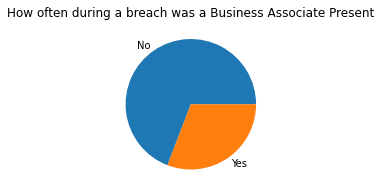

In [66]:
plt.title("How often during a breach was a Business Associate Present")
plt.pie(pie_chart['Name of Covered Entity'], labels=pie_chart['Business Associate Present'])

In [67]:
def func(x):
    i = x.split('/')
    return '-'.join([i[2], i[0]])

In [68]:
breaches_clean_Aanika['Breach Submission Date'] = breaches_clean_Aanika['Breach Submission Date'].apply(lambda x : func(x))

In [69]:
new = breaches_clean_Aanika.sort_values("Breach Submission Date")

In [70]:
data = new.groupby('Breach Submission Date').sum()['Individuals Affected'][1:-1]

In [71]:
new

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
904,Muskingum Valley Health Centers,OH,Healthcare Provider,7447,2020-07,Hacking/IT Incident,"Electronic Medical Record, Network Server",No
903,Freeport Regional Health Care Foundation,IL,Healthcare Provider,4120,2020-07,Hacking/IT Incident,Email,No
901,"Dynasplint Systems, Inc.",MD,Healthcare Provider,102800,2020-08,Hacking/IT Incident,Network Server,No
893,BEACON ORTHOPAEDICS & SPORTS MEDICINE,OH,Healthcare Provider,2869,2020-08,Theft,"Other, Other Portable Electronic Device",No
894,Assured Imaging,AZ,Healthcare Provider,244813,2020-08,Hacking/IT Incident,Network Server,No
...,...,...,...,...,...,...,...,...
21,Southwest Health Center,WI,Healthcare Provider,46142,2022-07,Hacking/IT Incident,Network Server,No
20,Phoenixville Hospital,PA,Healthcare Provider,934,2022-07,Unauthorized Access/Disclosure,Desktop Computer,No
19,Change Healthcare,GA,Business Associate,1262,2022-07,Unauthorized Access/Disclosure,Paper/Films,Yes
17,"Kurilec Eye Care, LLC",CT,Healthcare Provider,2876,2022-07,Hacking/IT Incident,Electronic Medical Record,Yes


The scatterplot below shows the data breaches along with the month and year of the attack. We are able to vizualize this data and can attempt to notice trends. For example, the summer months (June, July, August) are the most common months in which data breaches occur

Text(0, 0.5, 'Number of Data Breaches')

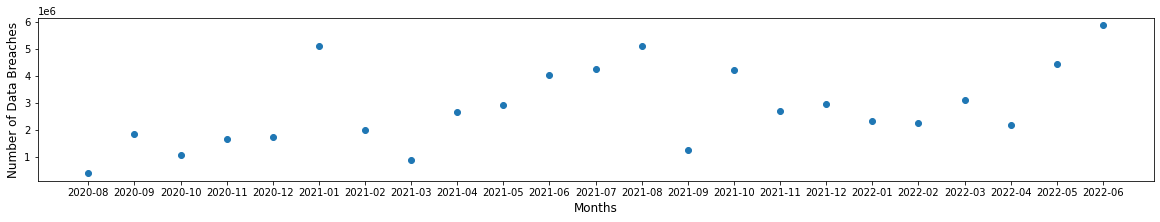

In [72]:
plt.scatter(x=data.index, y=data.values)
plt.rcParams["figure.figsize"] = [20,3]
plt.xlabel('Months', size = "large")
plt.ylabel('Number of Data Breaches', size = "large")

In [73]:
grouped_by_type.head()

,Type of Breach,tot_affected
0,Hacking/IT Incident,63723520
1,Improper Disposal,191220
2,Loss,33089
3,Theft,431252
4,Unauthorized Access/Disclosure,3120977


We will now visualise the individuals affected by each type of data breach. We can clearly see that hacking and IT incidents are the most common type of data breach.

<BarContainer object of 5 artists>

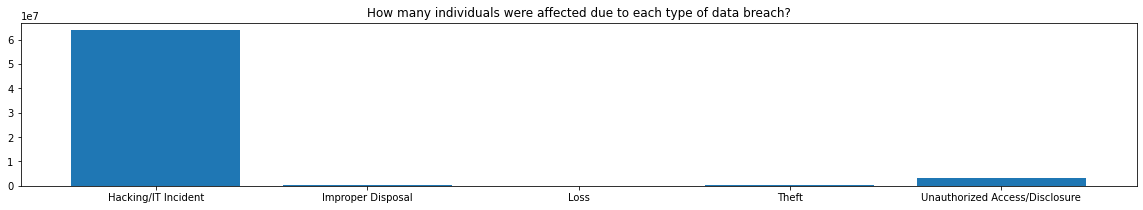

In [74]:
plt.title("How many individuals were affected due to each type of data breach?")
plt.bar(grouped_by_type['Type of Breach'], height = grouped_by_type['tot_affected'])

We can visualise the above data with a pie chart and see the distribution of data breach methods


In [75]:
pie = plt.pie(grouped_by_breach['tot_affected'], labels=None, autopct="%1.1f%%", pctdistance=1.5);
plt.legend(title = "Breaches")
labels= grouped_by_breach["Type of Breach"]
plt.title('Breaches', weight='bold', size=14)
plt.legend(pie[0],labels, bbox_to_anchor=(1.5,0), loc="right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

NameError: ignored

In [76]:
grouped_by_state = breaches_clean.groupby(['State', 'Location of Breached Information'], as_index = False)

In [77]:
yeet = grouped_by_state.agg(num_incidents = ('Location of Breached Information', "count"))
max = {} #AK -> (name of breach, count)
for i, row in yeet.iterrows():
    state = row["State"]
    breach = row["Location of Breached Information"] 
    num_incidents = row["num_incidents"] 
    if state in max:
        count = (max[state])[1]
        if num_incidents > count:
            max[state] = (breach, num_incidents)
    else:
        max[state] = (breach, num_incidents) 
states = []
incidences = []
locations = []
for state, report in max.items():
    states.append(state)
    incidences.append(report[1]) 
    locations.append(report[0])

With the above data, we will visualise the number of unique breaches for the most common breaches in each state. For example, the most common breach in California is a Network Server breach, and there were 36 unique occurences of this breach in the last 24 months

The dataframe below shows the most commonly affected data location. The visualisation follows.

In [78]:
data = {"State" : states, "Most Common Location" : locations}
df = pd.DataFrame(data)
df

,State,Most Common Location
0,AK,"Desktop Computer, Laptop, Network Server"
1,AL,Network Server
2,AR,Email
3,AZ,Network Server
4,CA,Network Server
5,CO,Email
6,CT,Email
7,DC,Email
8,DE,Network Server
9,FL,Network Server


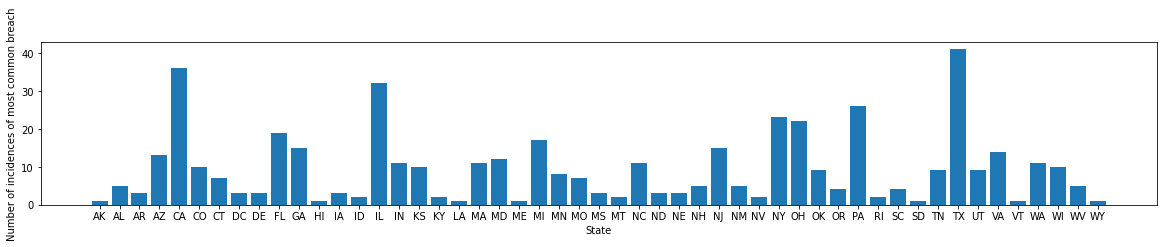

In [79]:
plt.bar(states, incidences);
plt.xlabel("State");
plt.ylabel("Number of incidences of most common breach");

This bar graph shows the Entity Type compromised during the data breach along with the number of Individuals Affected from the data breach. This data is significant as it shows that entering as a heatlhcare provider would cause more individuals to be affected, therefore increasing security measures on such accounts would be a step in the right direction. 

Text(0.5, 0, 'Covered Entity Type')

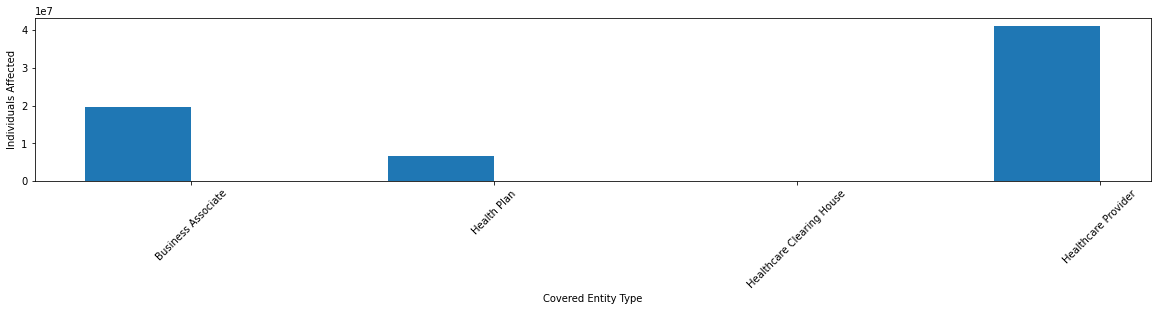

In [80]:
grouped_by_type = breaches_clean.groupby(['Covered Entity Type'], as_index = False).agg(tot_affected = ("Individuals Affected", "sum"))
x = np.arange(len(grouped_by_type['tot_affected']))
y = grouped_by_type['tot_affected']
width = 0.35 
labels = list(grouped_by_type["Covered Entity Type"])
fig, ax = plt.subplots()
ax.bar(x - width/2, list(y), width)
ax.set_xticks(x)
ax.set_xticklabels(list(grouped_by_type["Covered Entity Type"]), rotation =45)
ax.set_ylabel('Individuals Affected')
ax.set_xlabel('Covered Entity Type')